In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.manifold import TSNE
import seaborn as sns
from glove import Corpus, Glove
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy
import numpy as np
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
data_dir = "/content/drive/MyDrive/Quora-Data/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def data_loader(list_X, file_Y):
    df = pd.read_csv(list_X[0])
    for i in range(1, len(list_X)):
        tmp = pd.read_csv(list_X[i])
        df = df.join(tmp)
    return (df[df.columns.difference(['Y', 'qid1', 'qid', 'qid2', 'id'])], pd.read_csv(file_Y)['Y'])

In [ ]:
X_train, Y_train = data_loader([
                                data_dir + "pre-processing/features1_2_selected_train.csv",
                                #data_dir + "pre-processing/features_glove_train.csv"
                    ], 
                    data_dir + "pre-processing/train.csv")
X_test, Y_test = data_loader([
                                data_dir + "pre-processing/features1_2_selected_test.csv",
                              #data_dir + "pre-processing/features_glove_test.csv"
                    ], 
                    data_dir + "pre-processing/test.csv")

In [ ]:
def data_transformer(X):
    X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index=X.index)
    return X

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_t, Y_train)

In [ ]:
X_train_t = data_transformer(X_train)

In [ ]:
df_train_s = X_train_t.join(Y_train).sample(n=5000)
X_train_s, Y_train_s = df_train_s[df_train_s.columns.difference(['Y'])], df_train_s["Y"]

common_word_ratio  ...  lcs_ratio_min_proc
0                0.211293  ...           -0.274461
1                1.400809  ...            0.655057
2                1.074570  ...            1.681034
3               -0.127851  ...           -0.531155
4               -0.152902  ...           -0.522988
...                   ...  ...                 ...
323427           0.564452  ...           -0.438150
323428          -0.047690  ...            0.584905
323429           0.513440  ...           -0.829579
323430           1.074570  ...            0.064708
323431           1.074570  ...            0.857719

[323427 rows x 21 columns]

In [ ]:
df_t = X_train_t.join(Y_train).dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
X_train_t = df_t[df_t.columns.difference(['Y', 'qid1', 'qid', 'qid2', 'id', 'first_2_same_proc',
 'lcs_ratio_min',
 'lcs_ratio_max',
 'last_2_same',
 'last_word_same',
 'last_word_same_proc',
 'glove_cosine_avg',
 'last_2_same_proc',
 'lcs_ratio_min_proc',
 'lcs_ratio_max_proc',
 'glove_dist_l2_avg',
 'glove_dist_l1_avg',
 'fuzz_part_rat',
 'fuzz_part_rat_proc',
 'common_word_ratio',
 'fuzz_rat',
 'fuzz_rat_proc',
 'common_word_ratio_proc'])]
Y_train_t = df_t["Y"]

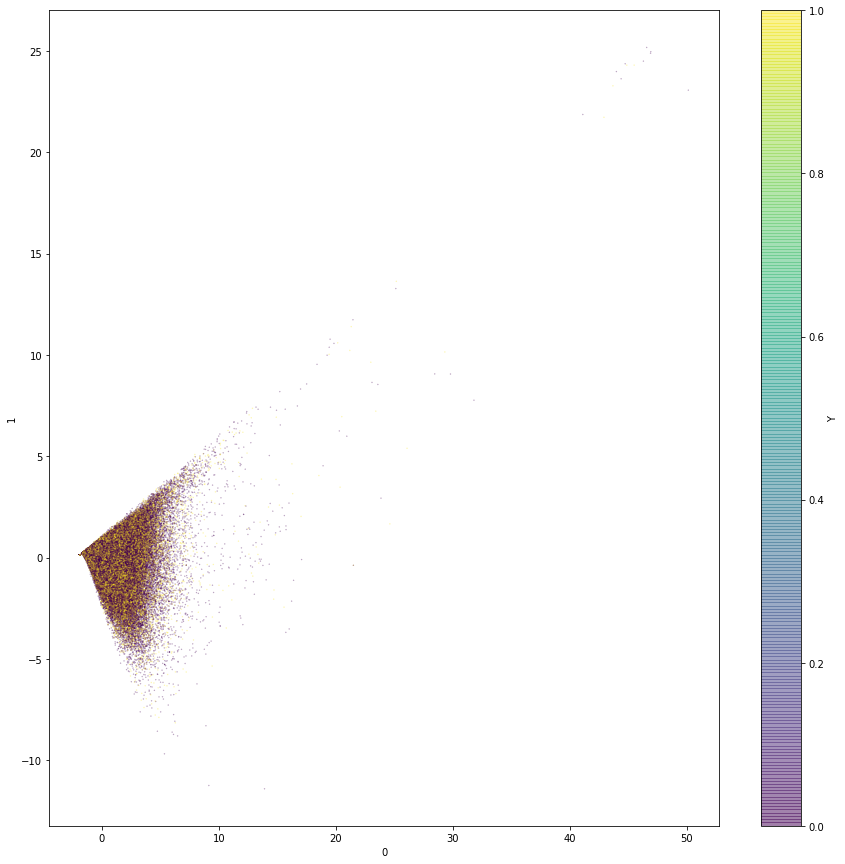

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame(PCA(n_components=2).fit_transform(X_train_t)).join(Y_train_t).plot.scatter(x=0, y=1, c="Y", s=0.1, colormap='viridis', alpha=0.5, ax=ax)

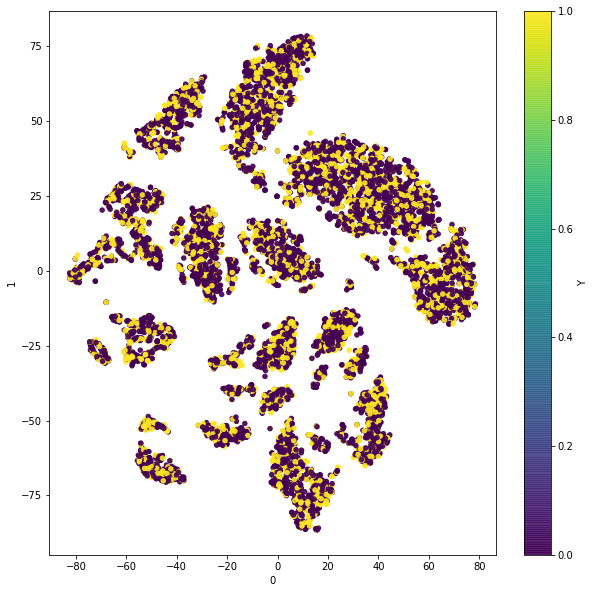

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
pd.DataFrame(TSNE(n_components=2, perplexity=40.0).fit_transform(X_train_s)).join(Y_train).plot.scatter(x=0, y=1, c="Y", colormap='viridis', alpha=0.9, ax=ax)

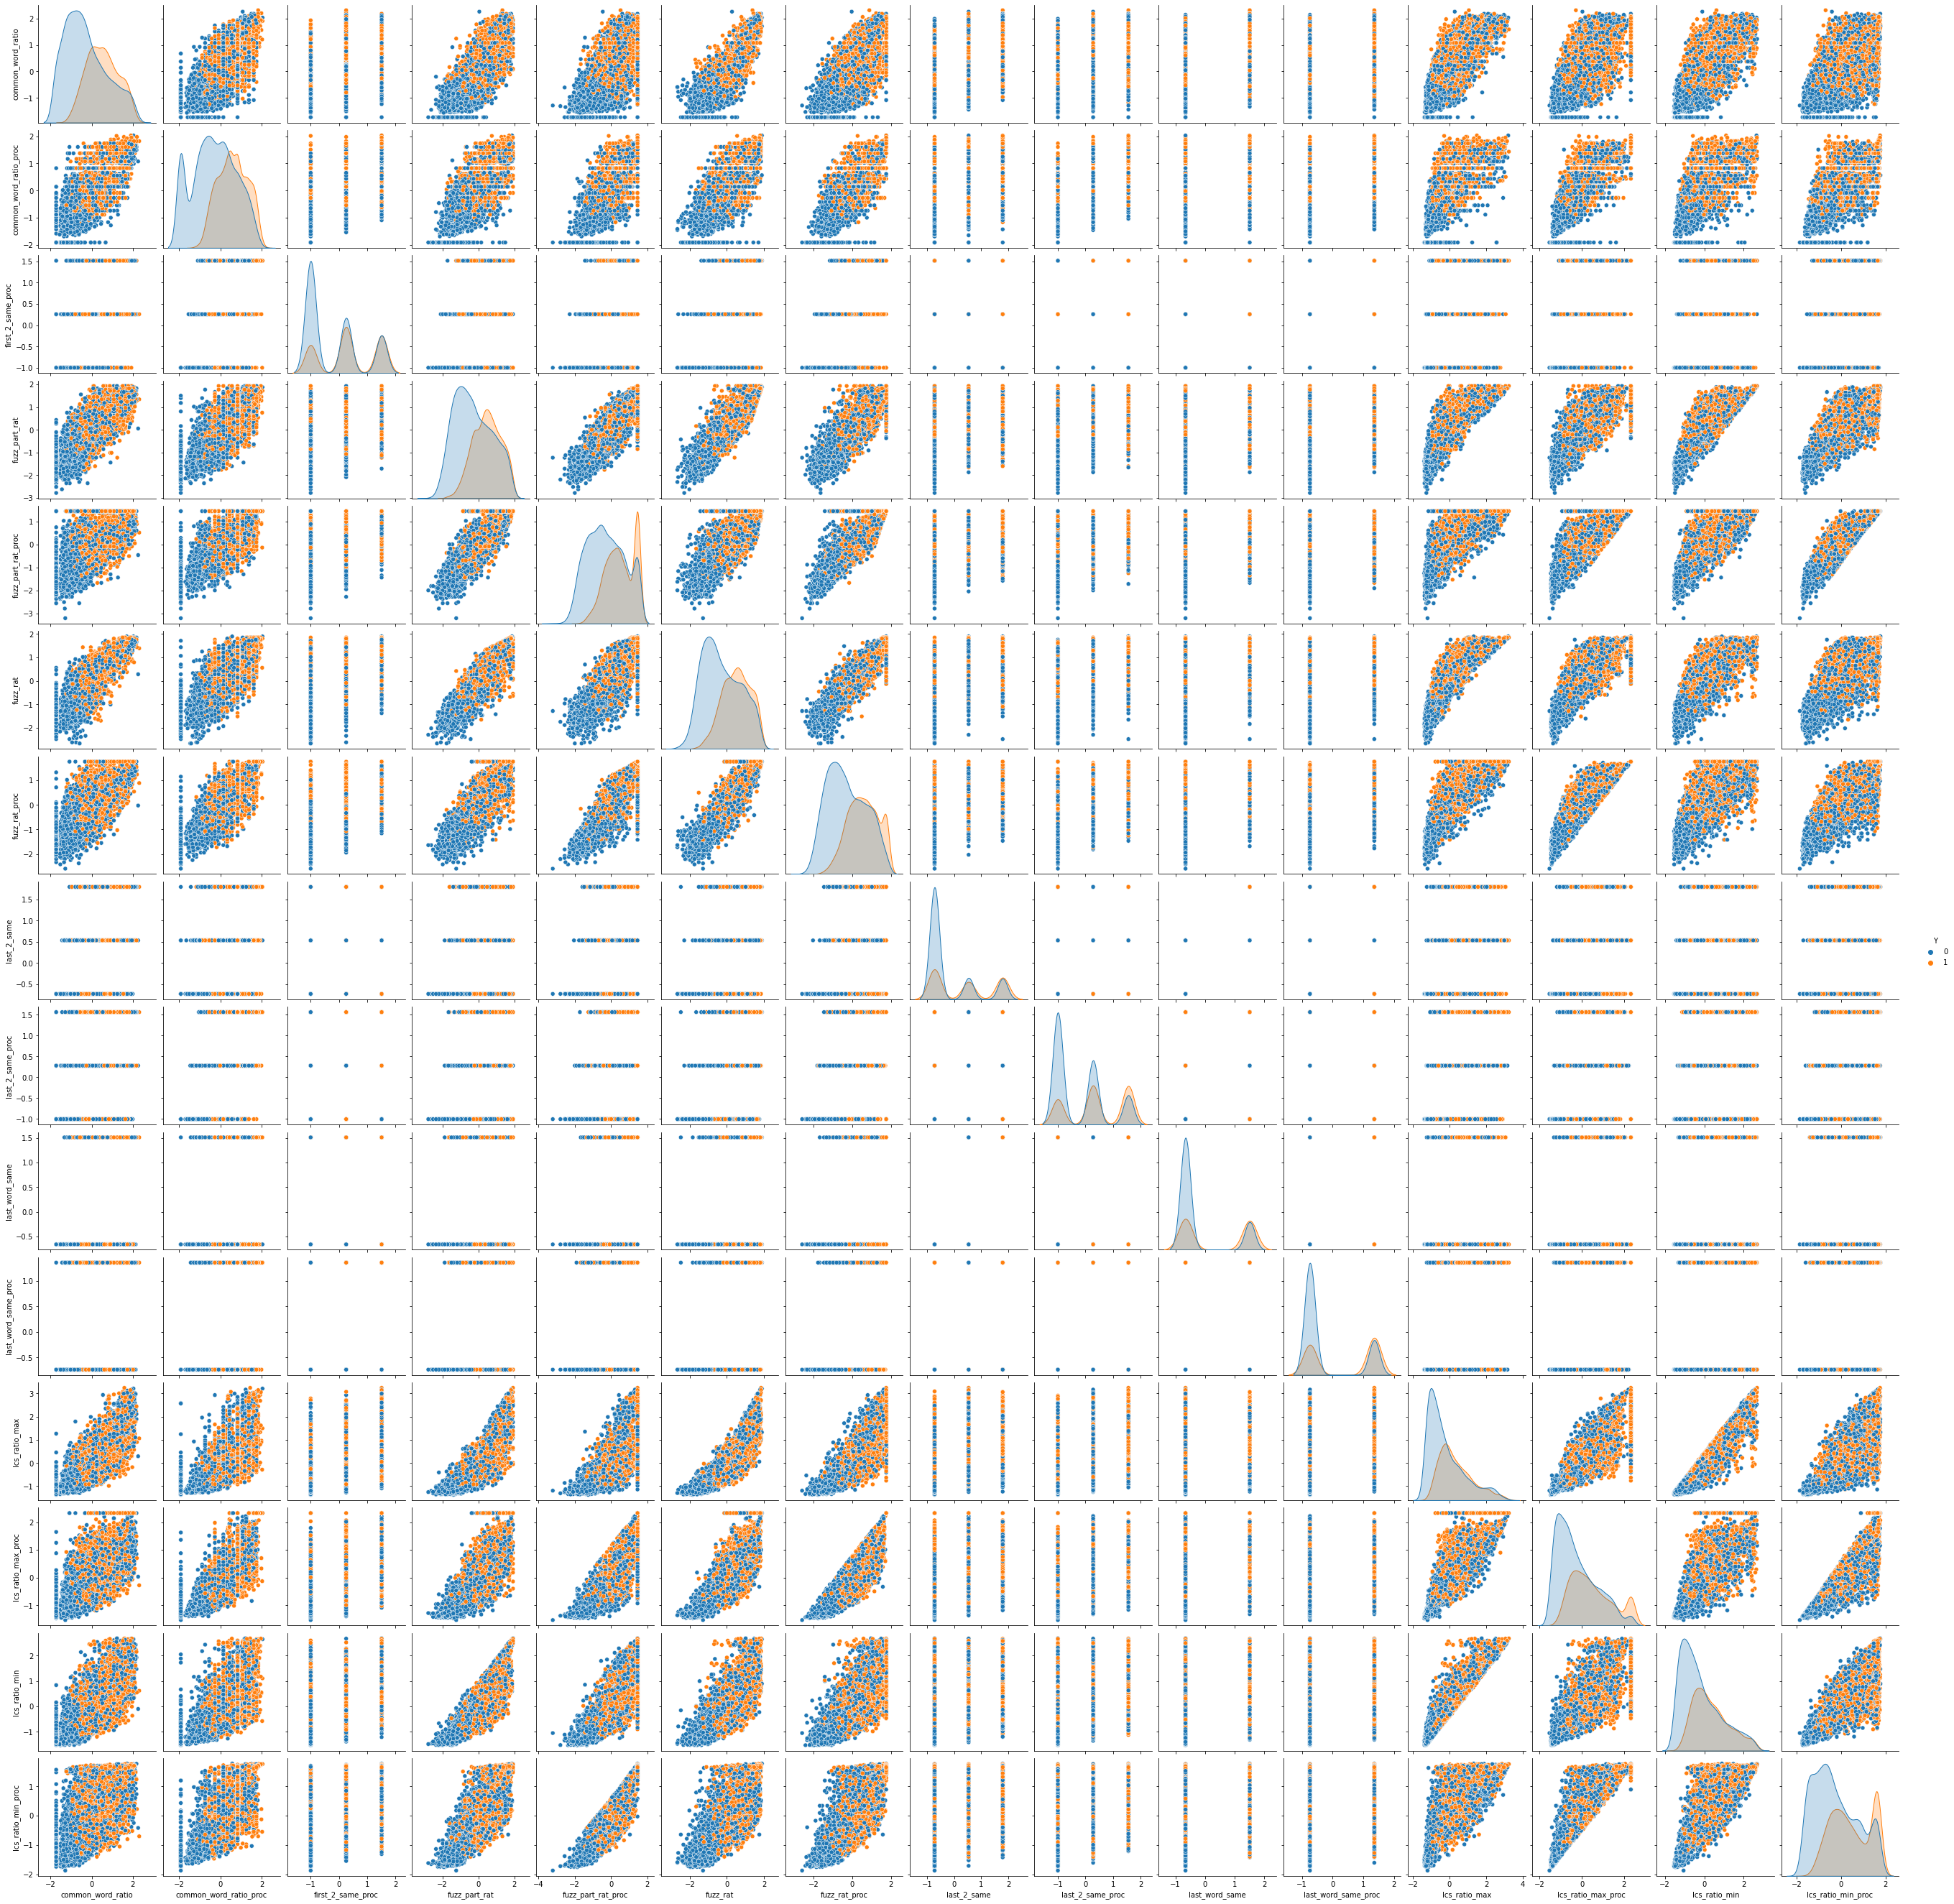

In [ ]:
g = sns.pairplot(X_train_s.join(Y_train_s), hue="Y")
plt.show()

In [ ]:
df_train = pd.read_csv(data_dir + "pre-processing/preprocessing_text_train.csv")
df_test = pd.read_csv(data_dir + "pre-processing/preprocessing_text_test.csv")

In [ ]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(X_tfidf["question"])

In [ ]:
df1_sm = scipy.sparse.coo_matrix((X_tfidf.drop(["question"], axis=1).values))

In [ ]:
df1_sm

<449641x1 sparse matrix of type '<class 'numpy.int64'>'
	with 449641 stored elements in COOrdinate format>

In [ ]:
X_tfidf

qid                                           question
0       434361                      install apk file window phone
1         8023  major effect cambodia earthquake effect compar...
2       280083                        stack exchange better quora
3        78324                   prevent pimple break inside nose
4       319381  good book online course follow grab concept st...
...        ...                                                ...
323424  152399      history non governmental organization ( ngo )
323425  492629      best company engineer work distributed system
323427  475260                benefit using enum declare constant
323430  449907  support 1877 778 89 69 compaq technical suppor...
323431  337011                         lollipop gummy bear differ

[449641 rows x 2 columns]

In [ ]:
fsb = SelectKBest(f_classif, k="all")
fsb.fit(X_train_t, Y_train_t)

SelectKBest(k='all', score_func=<function f_classif at 0x7f97ca0dd9e0>)

In [ ]:
list(pd.DataFrame({"col":X_train_t.columns, "score":fsb.scores_}).sort_values(by="score")["col"])

['first_2_same_proc',
 'lcs_ratio_min',
 'lcs_ratio_max',
 'glove_dist_l2',
 'last_2_same',
 'last_word_same',
 'last_word_same_proc',
 'glove_dist_l1',
 'glove_cosine',
 'glove_cosine_avg',
 'last_2_same_proc',
 'lcs_ratio_min_proc',
 'lcs_ratio_max_proc',
 'glove_dist_l2_avg',
 'glove_dist_l1_avg',
 'fuzz_part_rat',
 'fuzz_part_rat_proc',
 'common_word_ratio',
 'fuzz_rat',
 'fuzz_rat_proc',
 'common_word_ratio_proc']

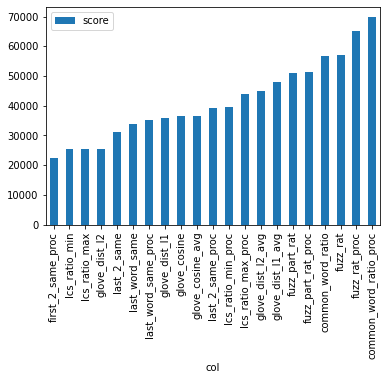

In [ ]:
pd.DataFrame({"col":X_train_t.columns, "score":fsb.scores_}).sort_values(by="score").plot.bar(x="col")

In [ ]:
for i, col in zip(range(len(X_train_t.columns)), X_train_t.columns):

common_word_ratio 56837.372126874805
common_word_ratio_proc 69715.19092700451
first_2_same_proc 22516.05851840247
fuzz_part_rat 51053.15182046711
fuzz_part_rat_proc 51448.96915632536
fuzz_rat 56989.09765901013
fuzz_rat_proc 65326.50455265828
glove_cosine 36584.36658452502
glove_cosine_avg 36584.366584525094
glove_dist_l1 35889.406235766946
glove_dist_l1_avg 48089.19596620438
glove_dist_l2 25581.128892989585
glove_dist_l2_avg 44993.59207818528
last_2_same 31042.417338221
last_2_same_proc 39120.768580775795
last_word_same 33906.99742755703
last_word_same_proc 35332.68525468652
lcs_ratio_max 25516.79530260365
lcs_ratio_max_proc 43870.58230649645
lcs_ratio_min 25458.56105487808
lcs_ratio_min_proc 39437.66281668744


In [ ]:
X_tfidf = df_train[["qid1", "question1"]].rename(columns={"qid1":"qid", "question1":"question"}).append(df_train[["qid2", "question2"]].rename(columns={"qid2":"qid", "question2":"question"})).drop_duplicates()

In [ ]:
df_glove_train = pd.read_csv(data_dir + "pre-processing/train_EDA1_preprocessing_with_lemma_EDA2_glove_EDA3.csv")
df_glove_test = pd.read_csv(data_dir + "pre-processing/test_EDA1_preprocessing_with_lemma_EDA2_glove_EDA3.csv")

In [ ]:
df_train=df_train.fillna("")

id  ...                                          question2
0       394437  ...    backup ( xap appx ) file installed window phone
1       373988  ...  major effect cambodia earthquake effect compar...
2       183101  ...                        stack exchange better quora
3        43553  ...                   avoid getting pimple inside nose
4       213919  ...           good online course probability statistic
...        ...  ...                                                ...
323427  346872  ...                benefit using enum declare constant
323428  143678  ...                            find gmail account list
323429  128137  ...  get wide range floor tile wall tile porcelain ...
323430  323891  ...  support 1877 778 89 69 compaq technical suppor...
323431  228034  ...                         lollipop gummy bear differ

[323432 rows x 5 columns]

In [ ]:
df_glove_train

num_word_q1  num_word_q2  num_char_q1  ...  glove_cosine  glove_cosine_avg  Y
0               21           17           21  ...      0.923777          0.923777  0
1                7           13            7  ...      0.974141          0.974141  0
2               13            6           13  ...      0.655340          0.655340  0
3               26           29           26  ...      0.942933          0.942933  0
4                9            7            9  ...      0.930768          0.930768  0
...            ...          ...          ...  ...           ...               ... ..
80853           15           14           15  ...      0.955155          0.955155  1
80854            9           10            9  ...      0.875998          0.875998  0
80855           10           12           10  ...      0.989504          0.989504  0
80856            6            4            6  ...      1.000000          1.000000  0
80857           15           20           15  ...      0.785938          0.785938  0

[80858 rows x 135 columns]

In [ ]:
X_glove_train = df_train[["id", "qid1", "qid2"]].join(df_glove_train)[['qid1', 'qid2', 'id', 'glove_dist_l2', 'glove_dist_l1',
       'glove_dist_l2_avg', 'glove_dist_l1_avg', 'glove_cosine',
       'glove_cosine_avg']]
X_glove_test = df_train[["id", "qid1", "qid2"]].join(df_glove_test)[['qid1', 'qid2', 'id', 'glove_dist_l2', 'glove_dist_l1',
       'glove_dist_l2_avg', 'glove_dist_l1_avg', 'glove_cosine',
       'glove_cosine_avg']]

In [ ]:
X_glove_train.to_csv(data_dir + "pre-processing/features_glove_train.csv", index=False)
X_glove_test.to_csv(data_dir + "pre-processing/features_glove_test.csv", index=False)

In [ ]:
df_glove_train = pd.read_csv(data_dir + "pre-processing/test_EDA1_preprocessing_with_lemma_EDA2_glove_EDA3.csv")

In [ ]:
def TPR_FPR(probabs, Y_true):
    probabs = pd.Series(probabs)
    Y_true = pd.Series(Y_true)
    FPR = []
    TPR = []
    for i in range(101):
        thres = i/100
        Y_pred = probabs.copy()
        Y_pred = Y_pred.apply(lambda x: 1 if x >= thres else 0, 0)
#         Y_true = np.array(Y_true)
#         Y_pred = np.array(Y_pred)
        FP = ((Y_true == 0) & (Y_pred == 1)).sum()
        TP = ((Y_true == 1) & (Y_pred == 1)).sum()
        FN = ((Y_true == 1) & (Y_pred == 0)).sum()
        TN = ((Y_true == 0) & (Y_pred == 0)).sum()
        TPR.append(TP/(TP+FN))
        FPR.append(FP/(FP+TN))
    return (TPR, FPR)

def plot_roc(clf, trained=False, X_train=None, Y_train=None, X_test=None, Y_test=None, std=False):
    if not trained:
        clf.fit(X_train, Y_train)
    if std:
        Y_test = Y_test.reset_index()["Y"]
    probas = pd.DataFrame(clf.predict_proba(X_test))
    test_TPR, test_FPR = TPR_FPR(probas[0], 1-Y_test)
    plt.plot(test_FPR, test_TPR)
    plt.show()
    test_TPR, test_FPR = TPR_FPR(probas[1], Y_test)
    plt.plot(test_FPR, test_TPR)
    plt.show()

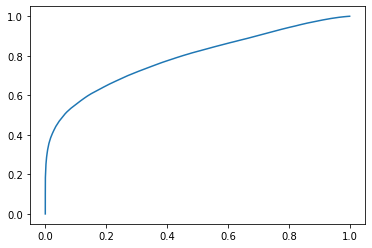

KeyboardInterrupt: ignored

In [ ]:

plot_roc(clf, True, X_train_t, Y_train, X_train_t, Y_train)

In [ ]:
clf.score(X_test, Y_test)

0.6335180192436123